In [20]:
import pandas as pd

In [22]:
df=pd.read_csv("mark_sheet_dataset.csv")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student_ID     1005 non-null   object 
 1   Gender         1005 non-null   object 
 2   Math_Score     1004 non-null   float64
 3   English_Score  1004 non-null   float64
 4   Science_Score  1004 non-null   float64
 5   Attendance     1004 non-null   float64
dtypes: float64(4), object(2)
memory usage: 47.2+ KB


In [26]:
df.head()

,Student_ID,Gender,Math_Score,English_Score,Science_Score,Attendance
0,S1001,Female,79.967142,86.792265,72.598574,75.460962
1,S1002,Male,73.617357,81.095604,76.843851,80.698075
2,S1003,Female,81.476885,70.715564,71.660641,82.931972
3,S1004,Female,90.230299,62.236759,75.536308,94.438438
4,S1005,Female,72.658466,78.378680,62.851083,87.782766


In [28]:
df.tail()

,Student_ID,Gender,Math_Score,English_Score,Science_Score,Attendance
1000,S2001,Male,30.000000,20.000000,25.000000,40.000000
1001,S2002,Male,135.000000,125.000000,120.000000,100.000000
1002,S1001,Female,79.967142,86.792265,72.598574,75.460962
1003,S1002,Male,73.617357,81.095604,76.843851,80.698075
1004,S1003,Female,81.476885,70.715564,71.660641,82.931972


In [30]:
df.describe

<bound method NDFrame.describe of      Student_ID  Gender  Math_Score  English_Score  Science_Score  Attendance
0         S1001  Female   79.967142      86.792265      72.598574   75.460962
1         S1002    Male   73.617357      81.095604      76.843851   80.698075
2         S1003  Female   81.476885      70.715564      71.660641   82.931972
3         S1004  Female   90.230299      62.236759      75.536308   94.438438
4         S1005  Female   72.658466      78.378680      62.851083   87.782766
...         ...     ...         ...            ...            ...         ...
1000      S2001    Male   30.000000      20.000000      25.000000   40.000000
1001      S2002    Male  135.000000     125.000000     120.000000  100.000000
1002      S1001  Female   79.967142      86.792265      72.598574   75.460962
1003      S1002    Male   73.617357      81.095604      76.843851   80.698075
1004      S1003  Female   81.476885      70.715564      71.660641   82.931972

[1005 rows x 6 columns]>

In [32]:
df.columns

Index(['Student_ID', 'Gender', 'Math_Score', 'English_Score', 'Science_Score',
       'Attendance'],
      dtype='object')

In [34]:
df.shape

(1005, 6)

In [36]:
df.isnull().sum()

Student_ID       0
Gender           0
Math_Score       1
English_Score    1
Science_Score    1
Attendance       1
dtype: int64

In [38]:
df["Math_Score"] = df["Math_Score"].fillna(df["Math_Score"].median())

In [40]:
df["English_Score"] = df["English_Score"].fillna(df["English_Score"].median())

In [42]:
df["Science_Score"] = df["Science_Score"].fillna(df["Science_Score"].median())

In [44]:
df["Attendance"] = df["Attendance"].fillna(df["Attendance"].median())

In [46]:
df.isnull().sum()

Student_ID       0
Gender           0
Math_Score       0
English_Score    0
Science_Score    0
Attendance       0
dtype: int64

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [49]:
numeric_cols=df.select_dtypes(include="number").columns

<Axes: xlabel='Math_Score', ylabel='Count'>

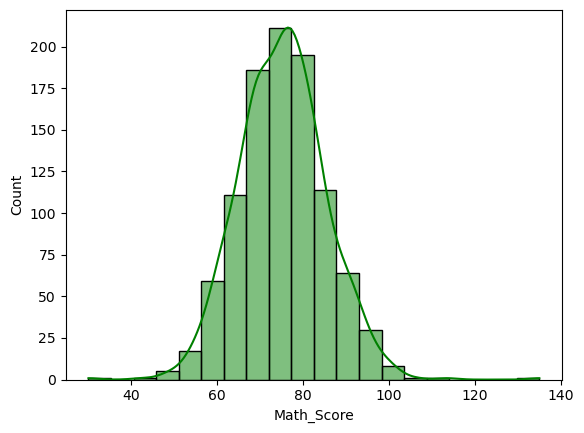

In [50]:
sns.histplot(df["Math_Score"],bins=20,kde=True,color="green")

<Axes: xlabel='English_Score', ylabel='Count'>

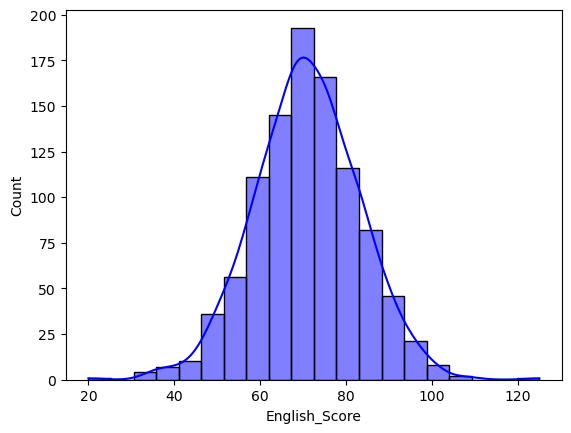

In [51]:
sns.histplot(df["English_Score"],bins=20,kde=True,color="blue")

<Axes: xlabel='Science_Score', ylabel='Count'>

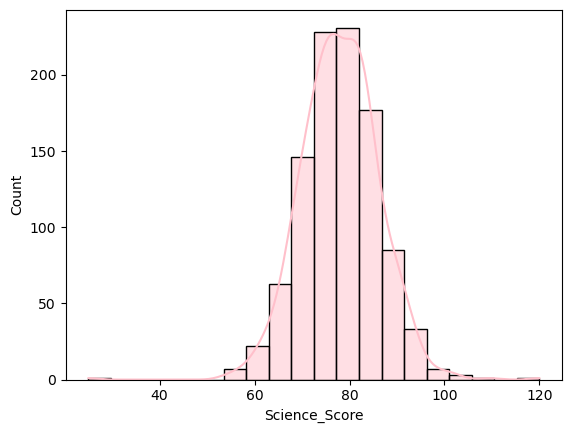

In [52]:
sns.histplot(df["Science_Score"],bins=20,kde=True,color="pink")

<Axes: xlabel='Attendance', ylabel='Count'>

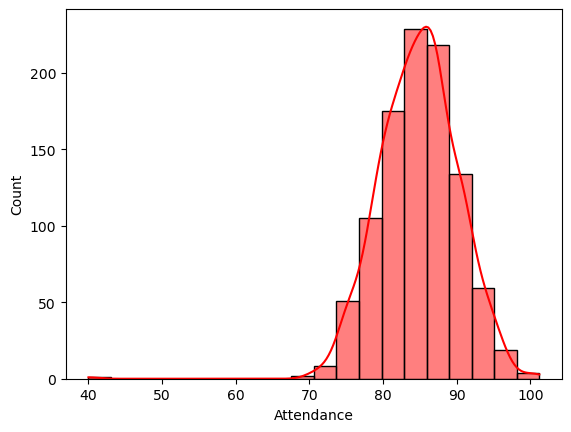

In [56]:
sns.histplot(df["Attendance"],bins=20,kde=True,color="red")

In [60]:
from scipy.stats import zscore
z_scores = df[['Math_Score','English_Score','Science_Score','Attendance']].apply(zscore)


In [62]:
z_scores

,Math_Score,English_Score,Science_Score,Attendance
0,0.472457,1.307039,-0.666715,-1.758755
1,-0.159487,0.839183,-0.144751,-0.778672
2,0.622710,-0.013310,-0.782035,-0.360617
3,1.493868,-0.709659,-0.305516,1.792724
4,-0.254918,0.616047,-1.865184,0.547170
...,...,...,...,...
1000,-4.500381,-4.178486,-6.519035,-8.394983
1001,5.949445,4.444970,5.161366,2.833525
1002,0.472457,1.307039,-0.666715,-1.758755
1003,-0.159487,0.839183,-0.144751,-0.778672


In [64]:
outliers=(z_scores < -3) | (z_scores > 3)

In [66]:
total_outliers=outliers.sum()

In [160]:
total_outliers

Math_Score       5
English_Score    4
Science_Score    4
Attendance       2
dtype: int64

In [71]:
df.columns

Index(['Student_ID', 'Gender', 'Math_Score', 'English_Score', 'Science_Score',
       'Attendance'],
      dtype='object')

In [73]:
numeric_cols = ['Math_Score', 'English_Score', 'Science_Score', 'Attendance']
original_stats = {}

In [75]:
for col in numeric_cols:
    mean_val = df[col].mean()
    df[col] =df[col].fillna(mean_val)
    std_val = df[col].std()
    original_stats[col] = (mean_val,std_val)
    df[col] = df[col].clip(lower = mean_val - 3 * std_val , upper = mean_val + 3 * std_val)
    print(f"clipped values in {col}")

clipped values in Math_Score
clipped values in English_Score
clipped values in Science_Score
clipped values in Attendance


In [77]:
for col in numeric_cols:
    mean_val = df[col].mean()
    std_val = df[col].std()
    mean_val , std_val = original_stats[col]
    lower_bound = mean_val - 3 * std_val
    upper_bound = mean_val + 3 * std_val
    outliers_remaining = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    if outliers_remaining == 0:
       print(f"outliers is {outliers_remaining} in {col}")
    else:
        print("outliers are there")

outliers is 0 in Math_Score
outliers is 0 in English_Score
outliers is 0 in Science_Score
outliers is 0 in Attendance


In [79]:
for col in numeric_cols:
    mean_val , std_val = original_stats[col]
    lower_bound = mean_val - 3 * std_val
    upper_bound = mean_val + 3 * std_val
    outliers_remaining = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f"outliers is {outliers_remaining} in {col}")
    

outliers is 0 in Math_Score
outliers is 0 in English_Score
outliers is 0 in Science_Score
outliers is 0 in Attendance


In [81]:
df[df.isnull().any(axis=1)]

,Student_ID,Gender,Math_Score,English_Score,Science_Score,Attendance


In [83]:
df[df['Math_Score'].isnull()]

,Student_ID,Gender,Math_Score,English_Score,Science_Score,Attendance


In [85]:
df[df['English_Score'].isnull()]

,Student_ID,Gender,Math_Score,English_Score,Science_Score,Attendance


In [87]:
df[df['Science_Score'].isnull()]

,Student_ID,Gender,Math_Score,English_Score,Science_Score,Attendance


In [89]:
df[df['Attendance'].isnull()]

,Student_ID,Gender,Math_Score,English_Score,Science_Score,Attendance


In [91]:
missing_indices = df[df.isnull().any(axis=1)].index

In [93]:
missing_indices

Index([], dtype='int64')

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

#corr_matrix = df.corr()
#sns.heatmap(corr_matrix, annot=True, cmap='Pastel2')
#plt.title("Correlation Matrix")
#plt.show()

In [178]:
dff=df[['Math_Score','English_Score','Science_Score','Attendance']]

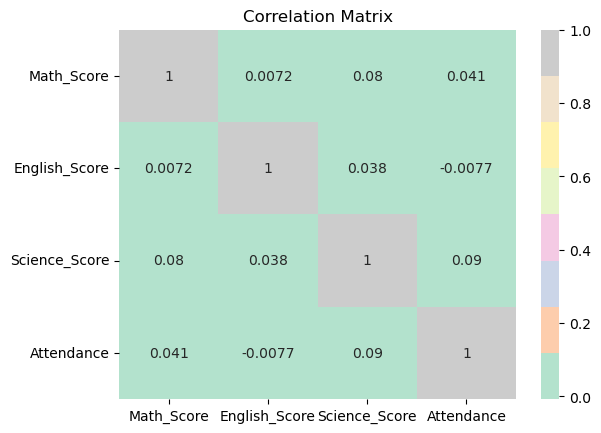

In [180]:
import matplotlib.pyplot as plt

corr_matrix=dff.corr()
sns.heatmap(corr_matrix,annot=True,cmap='Pastel2')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1200x1400 with 0 Axes>

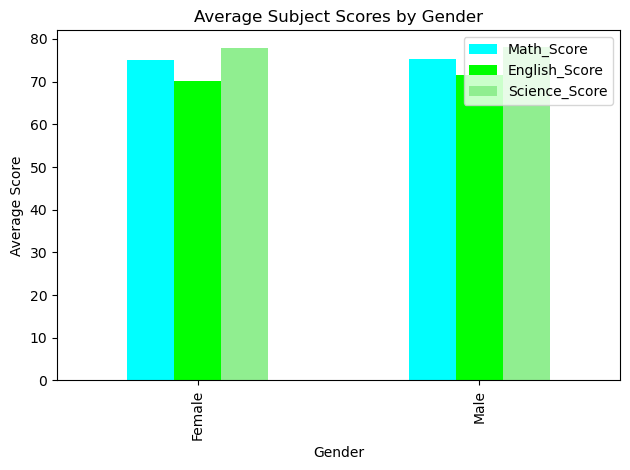

In [127]:
colors=['cyan','lime','lightgreen']
plt.figure(figsize=(12,14 ))
avg_scores_by_gender = df.groupby("Gender")[["Math_Score", "English_Score", "Science_Score"]].mean().reset_index()
avg_scores_by_gender.set_index("Gender").plot(kind='bar',color=colors)
plt.title("Average Subject Scores by Gender")
plt.ylabel("Average Score") 
plt.tight_layout()
plt.show()


In [99]:
avg_scores_by_gender

,Gender,Math_Score,English_Score,Science_Score
0,Female,75.084237,70.085582,77.927147
1,Male,75.316071,71.672042,78.123729


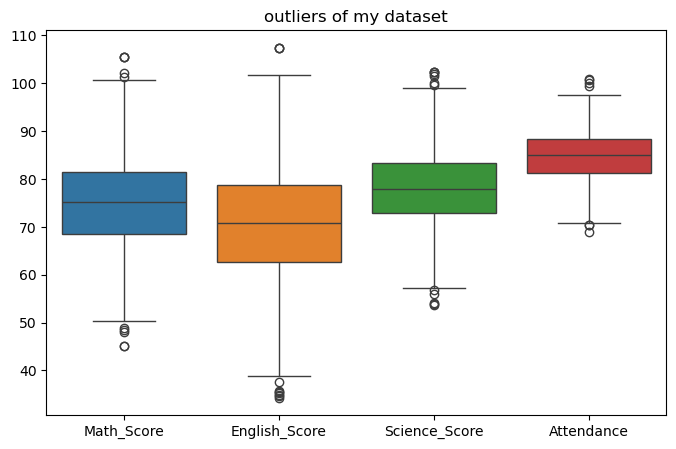

In [101]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df)
plt.title("outliers of my dataset")
plt.show()

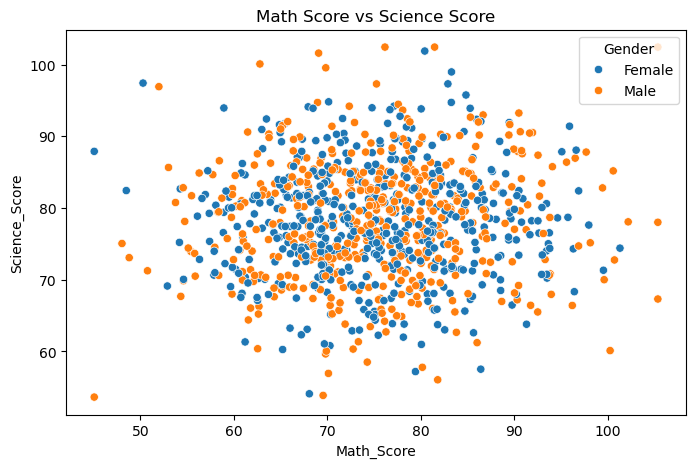

In [134]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Math_Score', y='Science_Score', hue='Gender')
plt.title("Math Score vs Science Score")
plt.show()


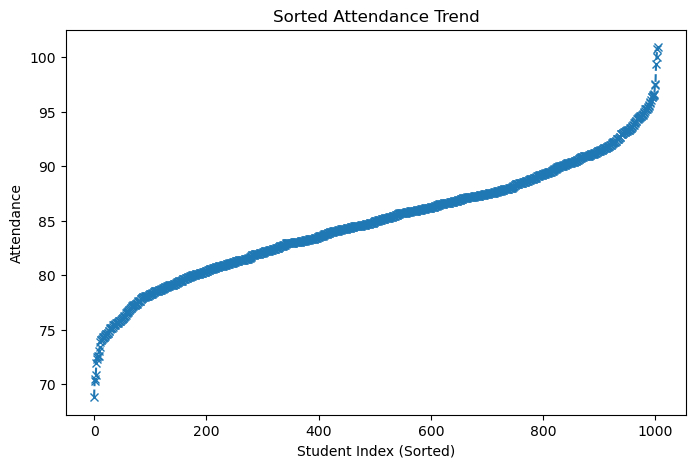

In [136]:
plt.figure(figsize=(8, 5))
df_sorted = df.sort_values(by='Attendance')
plt.plot(df_sorted['Attendance'].values, marker='x', linestyle='--')
plt.title("Sorted Attendance Trend")
plt.xlabel("Student Index (Sorted)")
plt.ylabel("Attendance")
plt.show()